# Detailed Exploratory Data Analysis (EDA) on Real-Time Air Quality Data

**Project:** DA323: Multimodal Data Analysis and Learning 2.0  
**Assignment:** Assignment-cum-Project-01 (Jan-May 2025, IIT Guwahati)

## Overview

This notebook presents a comprehensive analysis of the real-time air quality dataset collected from various locations in India. The dataset includes the following fields:
- **country:** Country name
- **state:** State name
- **city:** City name
- **station:** Monitoring station name
- **last_update:** Timestamp of the last update (in the format `dd-mm-YYYY HH:MM:SS`)
- **latitude & longitude:** Geographic coordinates of the monitoring station
- **pollutant_id:** Identifier for the pollutant (e.g., CO, PM2.5, SO2, PM10)
- **pollutant_min, pollutant_max, pollutant_avg:** Minimum, maximum, and average values recorded for the pollutant

## Objectives

1. **Data Loading & Cleaning:** Load the dataset, convert data types, and check for missing values.
2. **Descriptive Analysis:** Summarize numerical and categorical features.
3. **Visualization & Trend Analysis:** Use various plots to visualize distributions, state-wise trends, and geographic patterns.
4. **Advanced Analysis:** Create pivot tables, correlation heatmaps, and perform detailed state-wise analysis.


## 1. Setup and Data Loading

In this section, we will import the necessary Python libraries and load the dataset into a Pandas DataFrame.


In [1]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization styles
sns.set(style='whitegrid')
plt.style.use('ggplot')

# Load the dataset (ensure the CSV file is in your working directory)
df = pd.read_csv("real_time_air_quality_index.csv")

# Display the first few rows to understand the structure
print("Dataset Head:")
print(df.head())


C:\Users\iitia\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset Head:
  country  state     city                           station  \
0   India  Bihar     Gaya          Kareemganj, Gaya - BSPCB   
1   India  Bihar     Gaya       SFTI Kusdihra, Gaya - BSPCB   
2   India  Bihar     Gaya       SFTI Kusdihra, Gaya - BSPCB   
3   India  Bihar  Hajipur  Industrial Area, Hajipur - BSPCB   
4   India  Bihar  Hajipur  Industrial Area, Hajipur - BSPCB   

           last_update   latitude  longitude pollutant_id  pollutant_min  \
0  08-03-2025 17:00:00  24.792403  84.992416           CO            2.0   
1  08-03-2025 17:00:00  24.762518  84.982348        PM2.5           16.0   
2  08-03-2025 17:00:00  24.762518  84.982348          SO2            6.0   
3  08-03-2025 17:00:00  25.697189  85.245900        PM2.5          158.0   
4  08-03-2025 17:00:00  25.697189  85.245900         PM10          110.0   

   pollutant_max  pollutant_avg  
0           94.0           43.0  
1           63.0           37.0  
2           11.0            8.0  
3          374

## 2. Data Cleaning and Preprocessing

Before diving into the analysis, we need to ensure that our data is clean and in the correct format. Steps include:
- Converting the `last_update` column to a datetime format.
- Checking for and handling any missing values.
- Verifying the data types.


In [2]:
# Convert 'last_update' to datetime format
df['last_update'] = pd.to_datetime(df['last_update'], format='%d-%m-%Y %H:%M:%S')

# Check for missing values in each column
missing_vals = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_vals)

# Display data types to verify conversion
print("\nData Types:")
print(df.dtypes)


Missing Values in Each Column:
country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    153
pollutant_max    153
pollutant_avg    153
dtype: int64

Data Types:
country                  object
state                    object
city                     object
station                  object
last_update      datetime64[ns]
latitude                float64
longitude               float64
pollutant_id             object
pollutant_min           float64
pollutant_max           float64
pollutant_avg           float64
dtype: object


## 3. Descriptive Statistics and Data Overview

Let's obtain a quick statistical summary of our numerical features and explore the unique values in our categorical columns (e.g., state, pollutant_id). This gives us an initial understanding of the data distribution.


In [3]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

# Unique values in key categorical columns
print("\nUnique States:")
print(df['state'].unique())

print("\nUnique Pollutant Types:")
print(df['pollutant_id'].unique())


Summary Statistics:
                         last_update     latitude    longitude  pollutant_min  \
count                           3245  3245.000000  3245.000000    3092.000000   
mean   2025-03-08 16:59:59.999999744    22.280879    78.774468      24.555304   
min              2025-03-08 17:00:00     8.514909    70.909168       1.000000   
25%              2025-03-08 17:00:00    19.000084    75.565602       5.000000   
50%              2025-03-08 17:00:00    23.043070    77.494094      14.000000   
75%              2025-03-08 17:00:00    26.803650    80.927299      35.000000   
max              2025-03-08 17:00:00    34.066206    94.636574     193.000000   
std                              NaN     5.530706     4.914366      26.377370   

       pollutant_max  pollutant_avg  
count    3092.000000    3092.000000  
mean       93.247736      52.905239  
min         1.000000       1.000000  
25%        21.000000      13.750000  
50%        65.000000      35.000000  
75%       126.000000  

## 4. Overall EDA Visualizations

We now create several plots to visualize various aspects of the dataset:

1. **Boxplot:** To analyze the distribution of `pollutant_avg` for each pollutant type.
2. **Bar Plot:** To compare the mean pollutant average values across different pollutants.
3. **Scatter Plot:** To visualize the geographic distribution of the monitoring stations.
4. **Histogram:** To understand the temporal distribution of data based on the `last_update` field.


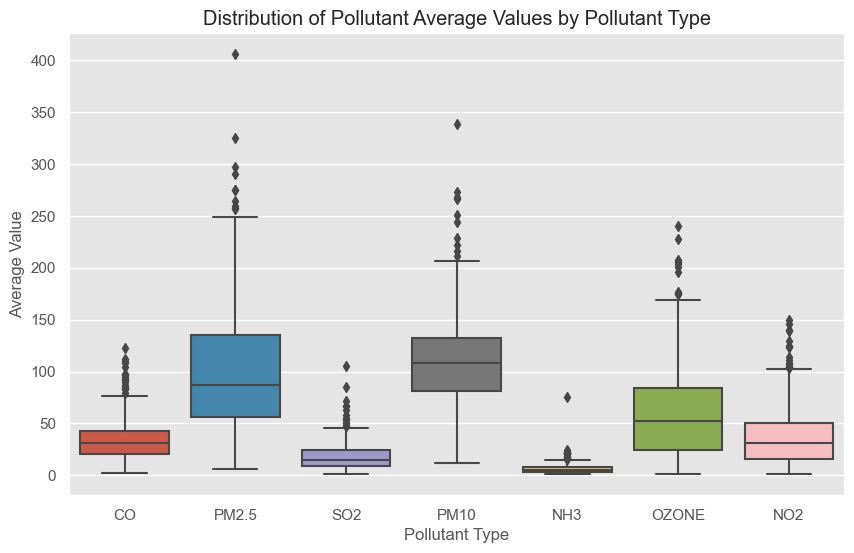

In [4]:
# Boxplot: Distribution of pollutant_avg by pollutant type
plt.figure(figsize=(10, 6))
sns.boxplot(x='pollutant_id', y='pollutant_avg', data=df)
plt.title("Distribution of Pollutant Average Values by Pollutant Type")
plt.xlabel("Pollutant Type")
plt.ylabel("Average Value")
plt.show()


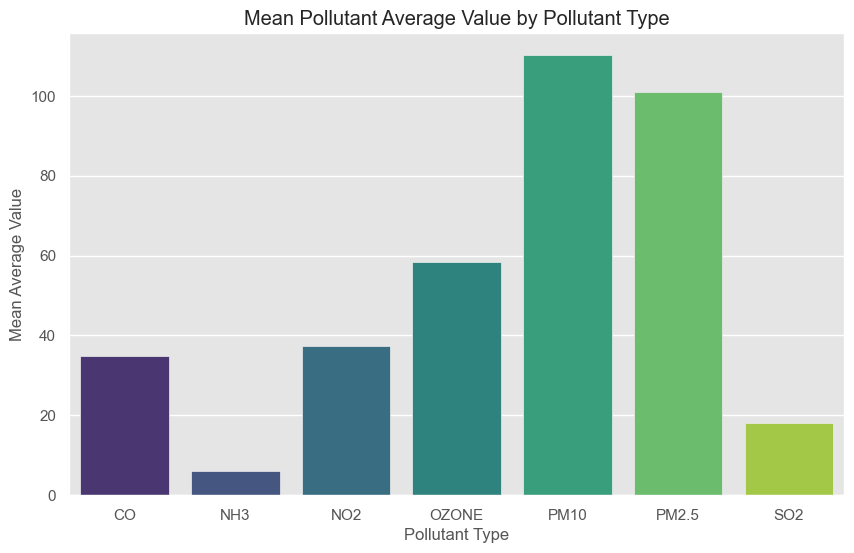

In [5]:
# Bar plot: Mean pollutant_avg for each pollutant type
mean_pollutant = df.groupby('pollutant_id')['pollutant_avg'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='pollutant_id', y='pollutant_avg', data=mean_pollutant, palette='viridis')
plt.title("Mean Pollutant Average Value by Pollutant Type")
plt.xlabel("Pollutant Type")
plt.ylabel("Mean Average Value")
plt.show()


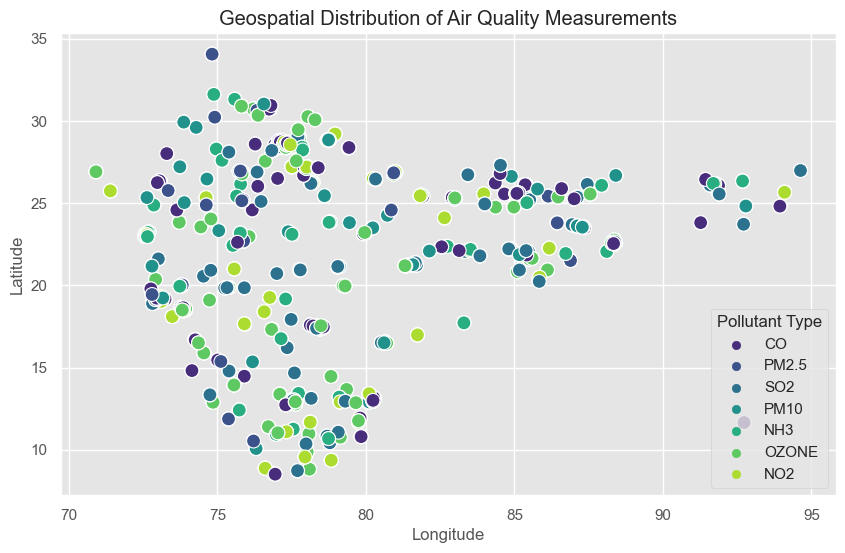

In [6]:
# Scatter plot: Geographic distribution of monitoring stations colored by pollutant type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='pollutant_id', data=df, palette='viridis', s=100)
plt.title("Geospatial Distribution of Air Quality Measurements")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Pollutant Type')
plt.show()


C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


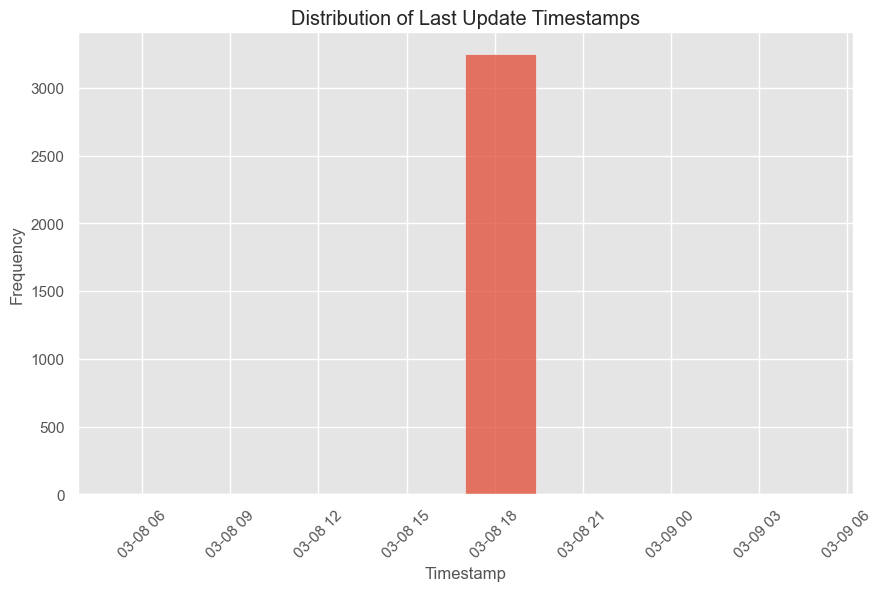

In [7]:
# Histogram: Distribution of data update timestamps
plt.figure(figsize=(10, 6))
sns.histplot(df['last_update'], bins=10, kde=False)
plt.title("Distribution of Last Update Timestamps")
plt.xlabel("Timestamp")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


## 5. State-wise Analysis

We now explore the data at a state level to:
1. Analyze the average pollutant values by state.
2. Count the number of unique monitoring stations per state.


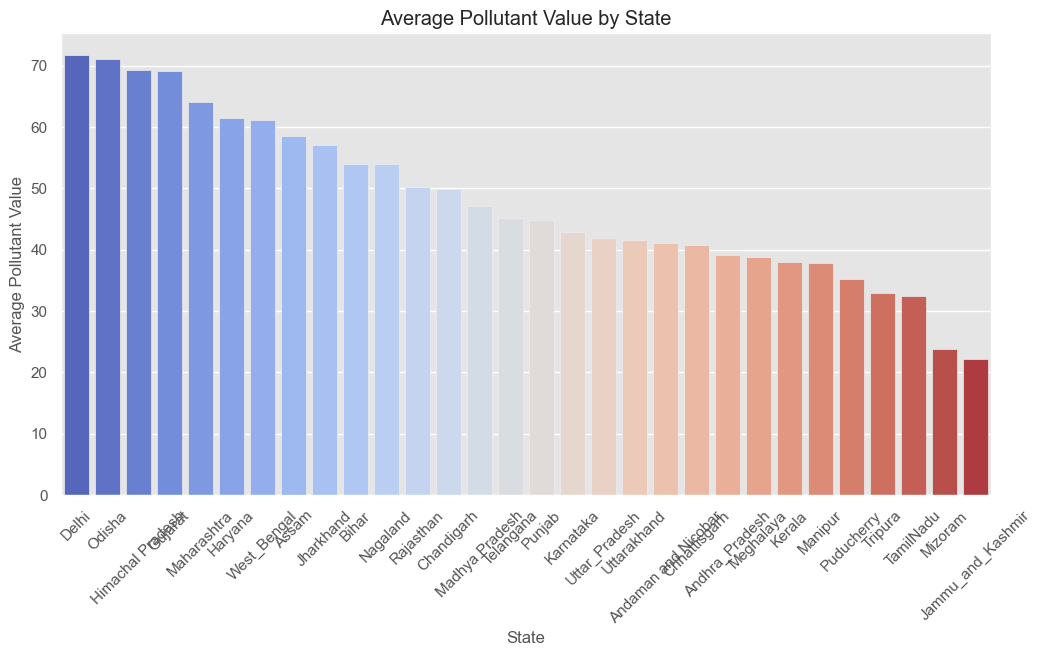

In [8]:
# Calculate and plot the average pollutant value for each state
state_pollutant_avg = df.groupby('state')['pollutant_avg'].mean().reset_index().sort_values(by='pollutant_avg', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='pollutant_avg', data=state_pollutant_avg, palette='coolwarm')
plt.title("Average Pollutant Value by State")
plt.xlabel("State")
plt.ylabel("Average Pollutant Value")
plt.xticks(rotation=45)
plt.show()


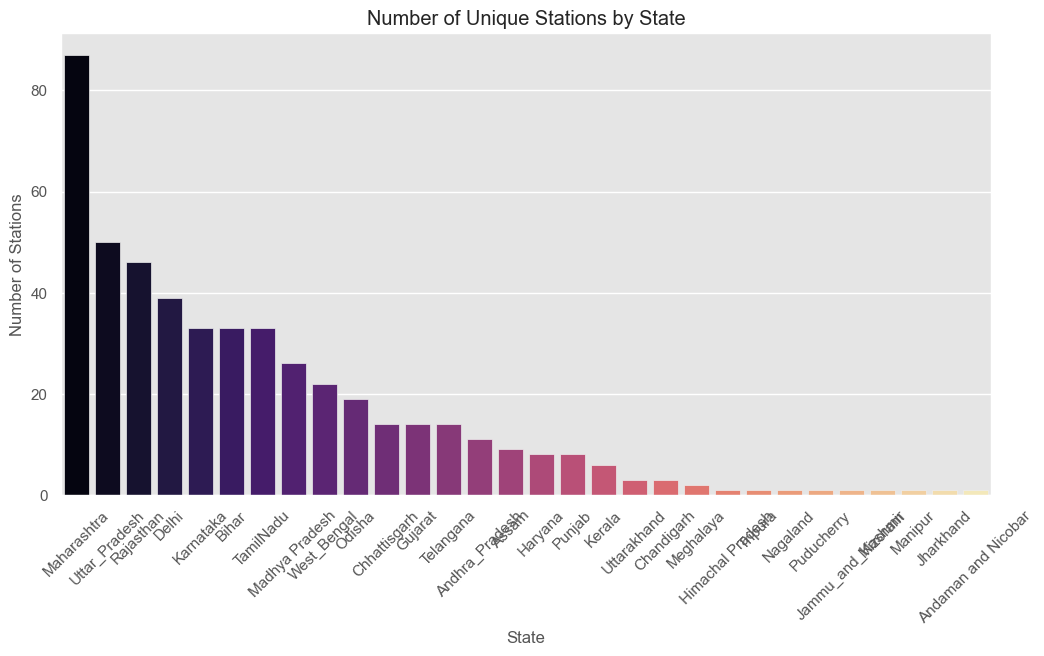

In [9]:
# Count unique monitoring stations per state
station_count = df.groupby('state')['station'].nunique().reset_index().sort_values(by='station', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='station', data=station_count, palette='magma')
plt.title("Number of Unique Stations by State")
plt.xlabel("State")
plt.ylabel("Number of Stations")
plt.xticks(rotation=45)
plt.show()


## 6. Advanced Analysis

To further understand the dataset, we will perform the following:
1. **Pivot Table and Heatmap:** Create a pivot table to compare the mean pollutant averages by state and pollutant type.
2. **Correlation Analysis:** Examine the relationships between the minimum, maximum, and average pollutant values.
3. **Pair Plot:** Visualize pairwise relationships among numerical features.


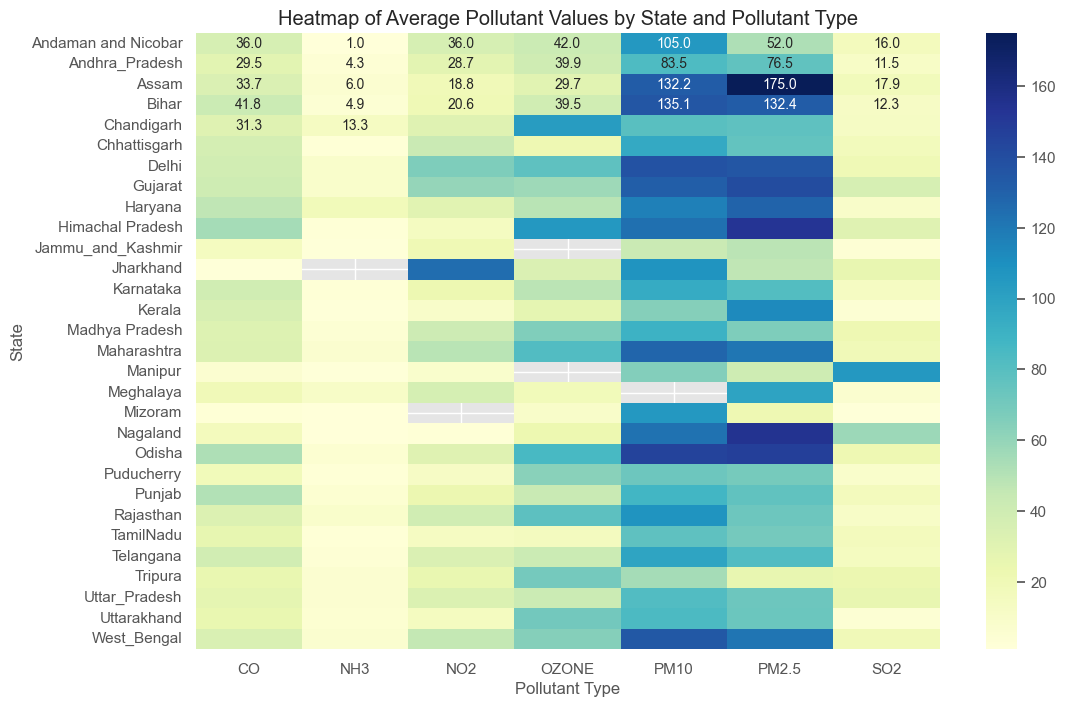

In [10]:
# Create a pivot table of mean pollutant_avg values for each state and pollutant type
pivot_table = df.pivot_table(values='pollutant_avg', index='state', columns='pollutant_id', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Heatmap of Average Pollutant Values by State and Pollutant Type")
plt.xlabel("Pollutant Type")
plt.ylabel("State")
plt.show()


               pollutant_min  pollutant_max  pollutant_avg
pollutant_min       1.000000       0.623041       0.756952
pollutant_max       0.623041       1.000000       0.896823
pollutant_avg       0.756952       0.896823       1.000000


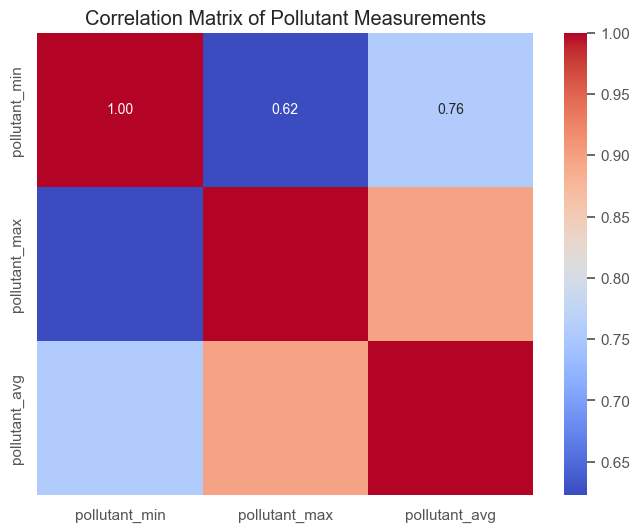

In [13]:
# Compute correlation matrix for pollutant measurement columns
numerical_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Pollutant Measurements")
plt.show()


C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


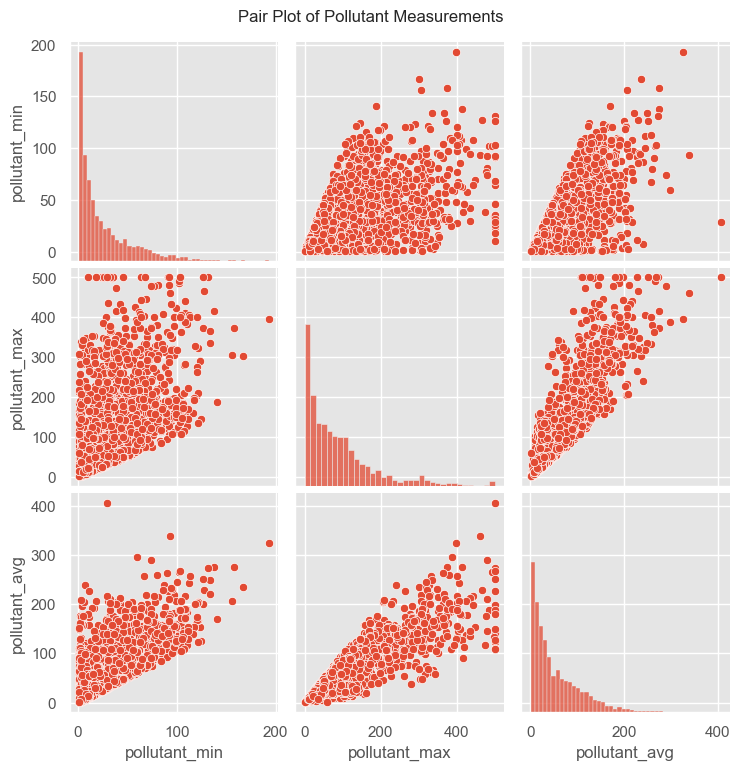

In [12]:
# Pair plot to visualize pairwise relationships among numerical features
sns.pairplot(df[numerical_cols])
plt.suptitle("Pair Plot of Pollutant Measurements", y=1.02)
plt.show()


## 7. Conclusion

In this notebook, we have:
- **Loaded and cleaned** the real-time air quality dataset.
- Generated **descriptive statistics** and an overview of the data.
- Performed various **visualizations** including boxplots, bar plots, scatter plots, and histograms to understand pollutant distributions, geographic patterns, and temporal trends.
- Conducted a **state-wise analysis** to assess regional air quality differences.
- Executed **advanced analyses** with pivot tables, correlation matrices, and pair plots to uncover deeper insights.

These steps provide a solid foundation for further analysis or integration with multimodal data tasks as part of the DA323 project.

Feel free to expand on this notebook by exploring additional facets, such as temporal trend analysis over longer periods or integrating weather data for deeper insights.
